<a href="https://colab.research.google.com/github/nimeshayasith/Computer_vision_Assignment/blob/main/4624_Question_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- STEP 1: RECONNECT GOOGLE DRIVE (Fixes Error 107) ---
from google.colab import drive
import os

# Force a remount to re-establish the broken connection
drive.mount('/content/drive', force_remount=True)

# Point back to your project folder
project_path = '/content/drive/MyDrive/CV_Assessment_01'
if os.path.exists(project_path):
    os.chdir(project_path)
    print("Drive reconnected and directory set successfully!")
else:
    print("Drive mounted, but folder not found. Please check your folder name.")

Mounted at /content/drive
Drive reconnected and directory set successfully!


In [2]:
import os

# Update this path if you named your folder something else
project_path = '/content/drive/MyDrive/CV_Assessment_01'

# Change the current working directory
os.chdir(project_path)

# Verify you are in the right place
print("Current Working Directory:", os.getcwd())
print("Files in Dataset folder:", os.listdir('Dataset'))

Current Working Directory: /content/drive/MyDrive/CV_Assessment_01
Files in Dataset folder: ['IPCV_ ASSIGNMENT_01_DATABASE.zip', 'IPCV_ ASSIGNMENT_01_DATABASE']


Successfully loaded MRI image (Image 5).


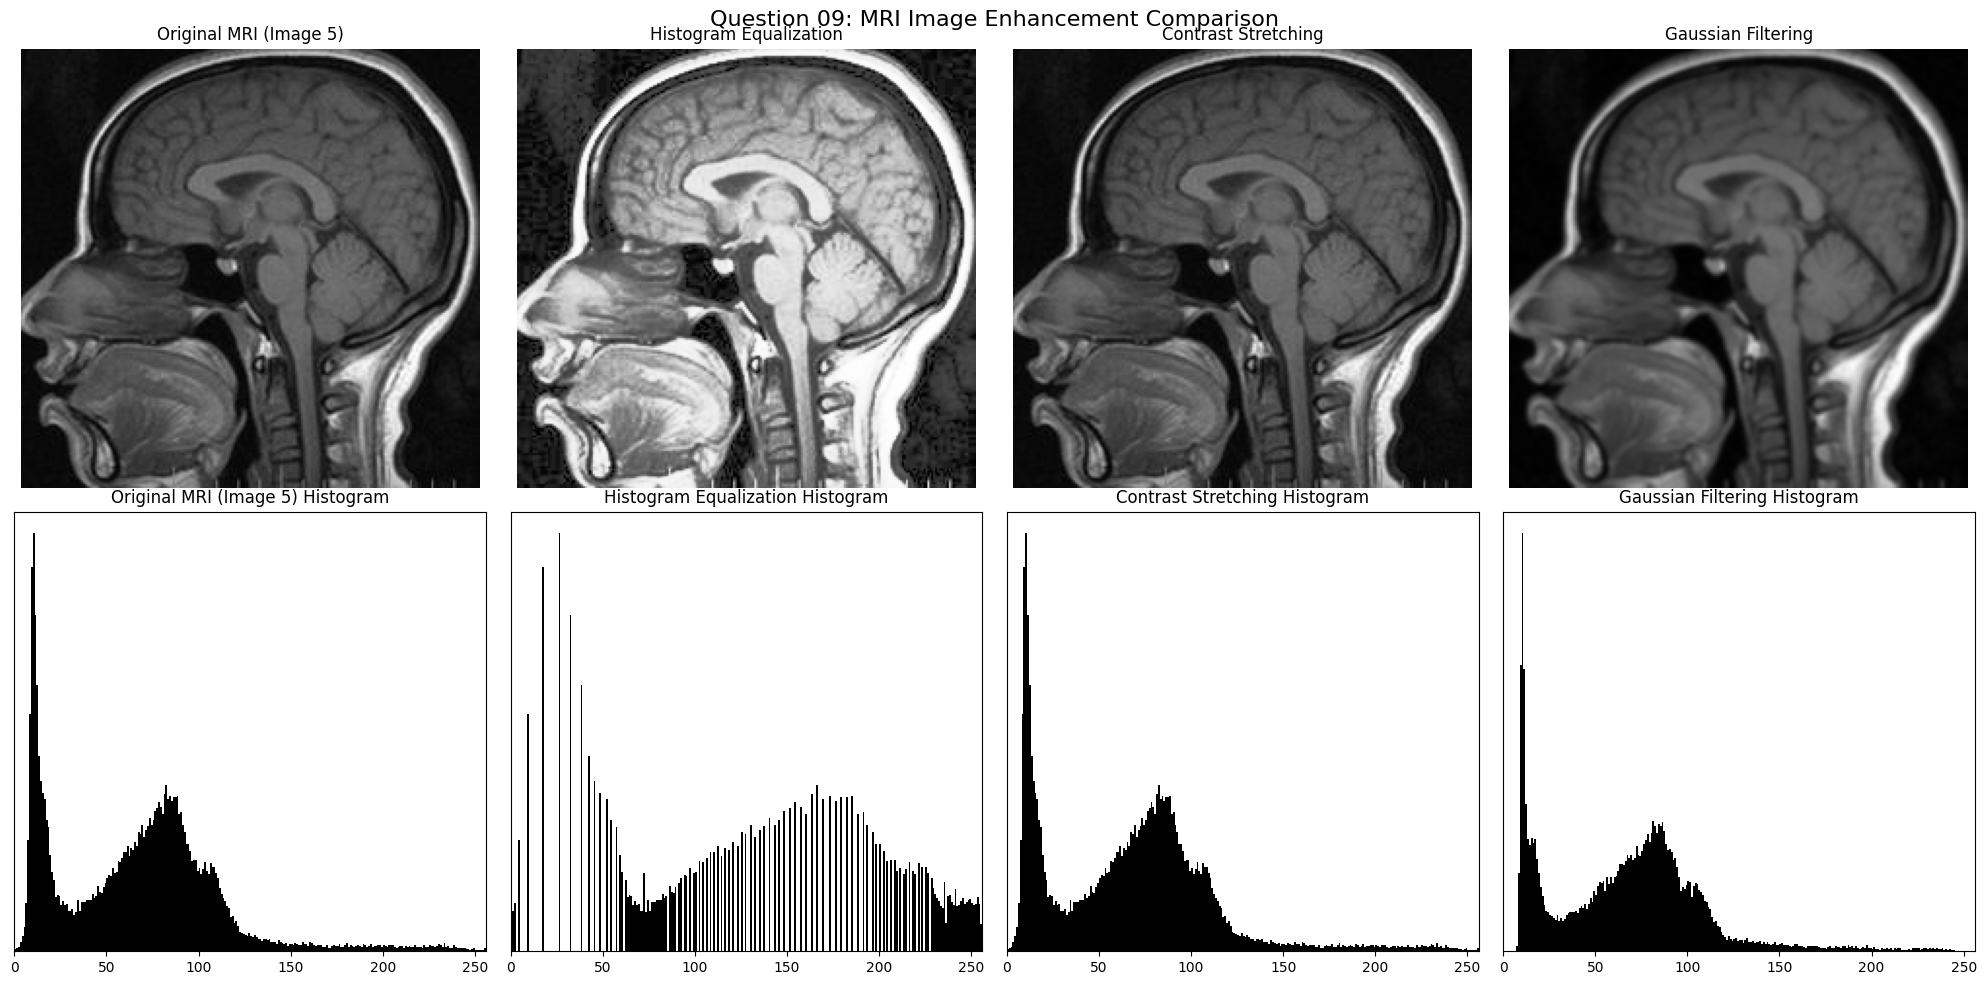

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load the MRI Image ---
# According to the instructions, we use Image 5 [cite: 70, 72]
img_5_path = 'Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Images_ For_Preliminary_Part/Image_5.jpg'
mri_image = cv2.imread(img_5_path, cv2.IMREAD_GRAYSCALE)

if mri_image is None:
    print(f"Error: Could not load {img_5_path}.")
else:
    print("Successfully loaded MRI image (Image 5).")

    # --- 2. Apply Enhancement Techniques [cite: 73] ---

    # Technique A: Histogram Equalization
    eq_image = cv2.equalizeHist(mri_image)

    # Technique B: Contrast Stretching (Normalization)
    # This stretches the pixel values to span the full 0-255 range
    stretched_image = cv2.normalize(mri_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Technique C: Noise Reduction (Gaussian Filtering)
    # We use a modest 5x5 kernel to reduce noise without excessively blurring anatomy
    blurred_image = cv2.GaussianBlur(mri_image, (5, 5), 1.0)

    # --- 3. PLOTTING FOR REPORT [cite: 74] ---
    # We will plot the images on the top row, and their histograms on the bottom row
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle("Question 09: MRI Image Enhancement Comparison", fontsize=16)

    images = [mri_image, eq_image, stretched_image, blurred_image]
    titles = ["Original MRI (Image 5)",
              "Histogram Equalization",
              "Contrast Stretching",
              "Gaussian Filtering"]

    for i in range(4):
        # Plot Image
        axes[0, i].imshow(images[i], cmap='gray')
        axes[0, i].set_title(titles[i])
        axes[0, i].axis('off')

        # Plot Histogram
        # .ravel() flattens the 2D image array into a 1D list of pixels for the histogram
        axes[1, i].hist(images[i].ravel(), bins=256, range=(0, 256), color='black')
        axes[1, i].set_title(titles[i] + " Histogram")
        axes[1, i].set_xlim([0, 256])
        axes[1, i].set_yticks([]) # Hide Y-axis numbers for a cleaner look

    plt.tight_layout()
    plt.show()